<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-Lab/blob/master/Bond_Analytics_Functions_Yield_to_Maturity_DV01_Credit_Spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bond Analytics Functions

This code provides three functions to calculate various analytics measures for a bond:

1. `calculate_ytm(price, coupon, face_value, time_to_maturity, frequency)`: Calculates the Yield to Maturity (YTM) for a bond.
2. `calculate_dv01(price, coupon, face_value, time_to_maturity, frequency)`: Calculates the DV01 (dollar value of a basis point) for a bond.
3. `calculate_credit_spread(price, coupon, face_value, time_to_maturity, frequency, risk_free_rate)`: Calculates the Credit Spread for a bond.

### Input Parameters:

- `price`: The current price of the bond.
- `coupon`: The coupon payment received per period.
- `face_value`: The face value or par value of the bond.
- `time_to_maturity`: The time to maturity of the bond in years.
- `frequency`: The number of coupon payments per year.
- `risk_free_rate`: The risk-free interest rate used to calculate the credit spread.

### Calculating Yield to Maturity (YTM):

The YTM represents the internal rate of return (IRR) of a bond, which equates the present value of all future cash flows (coupon payments and face value) to the current market price. The YTM is calculated iteratively using the Newton-Raphson method.

The formula to calculate the YTM for a bond is:

$$
\text{Present Value} = \sum_{t=1}^{n} \frac{{C / F}}{{(1 + r / F)^t}} + \frac{{F}}{{(1 + r / F)^n}}
$$

where:
- $C$ is the coupon payment per period.
- $F$ is the face value of the bond.
- $r$ is the yield to maturity (YTM).
- $n$ is the total number of periods until maturity.
- $t$ is the current period.

The function `calculate_ytm` uses this formula to calculate the YTM for a given bond.

### Calculating DV01:

The DV01 (dollar value of a basis point) measures the change in the bond price for a 0.01% (1 basis point) change in yield to maturity. It is an important measure for bond risk management.

The DV01 is calculated as the numerical derivative of the bond price with respect to the yield to maturity (YTM). It represents the change in price per basis point change in YTM.

The formula to calculate the DV01 for a bond is:

$$
\text{DV01} = \frac{{P - P'}}{{0.0001}}
$$

where:
- $P$ is the current bond price.
- $P'$ is the bond price for a slightly higher YTM (YTM + 0.0001).

The function `calculate_dv01` uses this formula to calculate the DV01 for a given bond.

### Calculating Credit Spread:

The Credit Spread represents the additional yield above the risk-free rate that investors demand for bearing the credit risk of the bond issuer. It measures the compensation for default risk.

The Credit Spread is calculated as the difference between the bond's YTM and the risk-free interest rate.

The formula to calculate the Credit Spread for a bond is:

$$
\text{Credit Spread} = \text{YTM} - \text{Risk-Free Rate}
$$

where:
- `YTM` is the yield to maturity of the bond.
- `Risk-Free Rate` is the risk-free interest rate used as a benchmark.

The function `calculate_credit_spread`

 uses this formula to calculate the Credit Spread for a given bond.

---

I hope this documentation helps clarify the usage and functionality of the provided code. Let me know if you have any further questions!

In [1]:
def calculate_ytm(price, coupon, face_value, time_to_maturity, frequency):
    guess = 0.05  # Initial guess for YTM
    ytm = guess
    epsilon = 0.0001  # Precision of YTM calculation
    max_iterations = 100  # Maximum number of iterations for convergence

    for _ in range(max_iterations):
        present_value = 0.0
        derivative = 0.0

        for t in range(1, time_to_maturity * frequency + 1):
            present_value += coupon / frequency / (1 + ytm / frequency) ** t
            derivative -= t * coupon / frequency / (1 + ytm / frequency) ** (t + 1)

        present_value += face_value / (1 + ytm / frequency) ** (time_to_maturity * frequency)
        derivative -= time_to_maturity * face_value / frequency / (1 + ytm / frequency) ** (time_to_maturity * frequency + 1)

        error = price - present_value

        if abs(error) < epsilon:
            return ytm

        ytm += error / derivative

    raise ValueError("YTM calculation did not converge")


def calculate_dv01(price, coupon, face_value, time_to_maturity, frequency):
    ytm = calculate_ytm(price, coupon, face_value, time_to_maturity, frequency)
    price_change = price - calculate_price(coupon, face_value, time_to_maturity, frequency, ytm + 0.0001)
    dv01 = price_change / 0.0001
    return dv01


def calculate_price(coupon, face_value, time_to_maturity, frequency, ytm):
    present_value = 0.0

    for t in range(1, time_to_maturity * frequency + 1):
        present_value += coupon / frequency / (1 + ytm / frequency) ** t

    present_value += face_value / (1 + ytm / frequency) ** (time_to_maturity * frequency)
    return present_value


def calculate_credit_spread(price, coupon, face_value, time_to_maturity, frequency, risk_free_rate):
    ytm = calculate_ytm(price, coupon, face_value, time_to_maturity, frequency)
    credit_spread = ytm - risk_free_rate
    return credit_spread


# Example usage
bond_price = 980.0
coupon_payment = 40.0
face_value = 1000.0
time_to_maturity = 5
coupon_frequency = 2
risk_free_rate = 0.02

ytm = calculate_ytm(bond_price, coupon_payment, face_value, time_to_maturity, coupon_frequency)
dv01 = calculate_dv01(bond_price, coupon_payment, face_value, time_to_maturity, coupon_frequency)
credit_spread = calculate_credit_spread(bond_price, coupon_payment, face_value, time_to_maturity,
                                        coupon_frequency, risk_free_rate)

print("Yield to Maturity (YTM): {:.2%}".format(ytm))
print("DV01: {:.2f}".format(dv01))
print("Credit Spread: {:.2%}".format(credit_spread))


Yield to Maturity (YTM): 4.45%
DV01: 4384.65
Credit Spread: 2.45%


## How to calculate Yield To Maturity with Python

https://medium.com/@gennadii.turutin/how-to-calculate-yield-to-maturity-with-python-65a9a34d56f3

In this article we are going to analyze one of the most common operations in Finance to build a simple Python YTM calculator.

### Introduction

Yield to Maturity is the most accurate way of comparing interest rates of different debt instruments. 
- It allows to account for specific payment periods and has a concept of Present Value behind its calculation, which implies that 100 “today” is worth more than 100 “tomorrow”, as it can be invested with interest. 
- If you are promised 110 in a year, Present Value might be very useful in analyzing your loan. 

- The formula for Present Value is quite trivial:

$PV = CF / (1 + i)^n$

$PV$ — present value ,

$CF$ — cash flow (or what you will get tomorrow),

$i$ — annual interest rate,

$n$ — number of years



But how would you get interest rate?

Let’s put it in the real context. You have 100 that you are ready to invest. Somebody wants to borrow your money and promises to pay back 103 in a year. 
- How can you calculate what it’s worth today? Here is where risk-free rate of return comes in handy. 
- This is the rate of return from safest investment available. 
- For instance, if you buy a U.S. Treasury bond, you may have 2% yearly interest rate. Thus

$103 / (1 + 0.02)¹ = $100.98$,

which is better than 100, but don’t forget about inflation, risks, alternative investments, and taxes, which we are going to skip here. 

- It is actually more complicated, but I hope we clarified the basic concepts here.

Note: You might be wondering what the difference between interest rate and yield to maturity is. While writing this article I came across different definitions, that don’t seem to be very helpful. 
  - I would prefer to stick to terminology used in the book “The economics of Money, Banking and Financial markets” by Frederic Mishkin. 
  - According to this book YTM is one the methods of calculating interest rates [page 70]. 
  Nevertheless, in the same book you can see that interest rate and yield to maturity are used interchangeably.


Four types of Credit Market Instruments
In general there are 4 types of Credit Market Instruments:

### 1. Simple loan

- You lend 100 and expect 110 in 2 years (the maturity date), where 10 is an additional payment for interest.

- Formula:

$PV =CF/(1 + i)^n$,

$PV$ — present value or loan value

$CF$ — cash flow,

$n$ — number of years until maturity,

$i$ — annual interest rate

What is the present value of the loan that you made above?

$PV = 110 / (1 + i)²$

Let’s find the safest investment and use its interest rate. Say, it is U.S. Treasury bonds with 2% annual interest.

$PV = 110 / (1 + 0.02)² = 105.77$

Looks like it’s worth lending money.

### 2. Fixed payment loan

You lend 100 and expect 50 yearly payments for the next 3 years.

Formula:

$LV = FP / (1 + i)¹ + FP / (1 + i)² + … + FP / (1 + i)^n$,

$LV$ — present value or loan value

$FP$ — fixed yearly payment,

$n$ — number of years until maturity,

$i$ — annual interest rate

Note: For simplicity we use frequency of payments as once a year. If you have more frequent payments, you should use the following formula:

$PV = FP / (1 + i/f)^(f) + FP / (1 + i/f)^(2f) + … + FP / (1 + i)^n$,

$f$ — frequency of payments

Bonds may have semi-annual payments. It affects interest compounding and and makes these bonds more attractive.



What is the yield for the above mentioned loan?

$100 = $10 / (1 + i) + $10 / (1 + i)² + 10 / (1 + i)³$

The equation looks daunting right now. Let’s solve it for i with Python later in the article using Newton’s method.



### 3. Coupon bond

You buy a bond for 100. The borrower promises to make yearly payments of 5% off the par (face value) and to pay the bond’s face value (100) at the maturity date.

Formula:

$PV = C / (1 + i)¹ + C / (1 + i)² + … + C / (1 + i)^n + F / (1 + i)^n$,

$PV$ — present value or bond price,

$C$ — fixed yearly coupon payments/coupon rate,
$n$ — number of years until maturity,
$i$ — interest rate

Note: Have you noticed that bond price and interest rate have a negative correlation? When interest rate goes up, bond price goes down. Keep it in mind. We’ll explore this correlation in greater detail later.

What’s the yield for the bond with face value 1000, annual coupon payments of $50 and maturity date in 3 years? The bond was purchased for 1000.

$1000 = 50 / (1 + i) + 50 / (1 + i)² + 50 / (1 + i)³ + 1000 / (1 + i)³$

$i = 5 %$ — this is your yield to maturity

Note: haven’t you noticed anything suspicious? The coupon rate is equal to YTM! What does it actually mean? 3 things:

1. If bond price is equal to its face value, YTM is equal to the coupon rate.

2. If the bond price is lower than the the face value, YTM is greater than the coupon rate

3. If the bond price is higher than the face value (premium bonds), than YTM is lower than the coupon rate.
Important to understand, that interest rates change first and bond prices follow, not vice-versa.



### 4. a discount bound

For 90 you buy a bond with a face value of 100 and expect the face value to be paid at the maturity date.

Formula:

$PV = F / (1 + i)^n$,

$PV$ — present value or loan value,
$F% — face value,
$i$ — interest rate

The calculations here seem to be quite simple. Assuming we have annual interest rate 2% and maturity date in 2 years, what is the bond price?

$PV = 100 / (1.02)² = 96.12$

## Code implementation
To calculate YTM for each debt instrument we’ll use risk-neutral measure, according to which the discounted payments expected in the future should be exactly equal to the bond price. You’ve probably already noticed it before, that we equalize bond prices to discounted payments. Now you know why.

### Simple loan implementation

The function for simple loan YTM is straightforward:

In [1]:
class Simple_Loan:
  def get_pv(self, flow, int_rate, maturity):
    pv = flow / (1+ int_rate)**maturity
    return pv

  def get_ytm(self, flow, pv, maturity):
    ytm = (flow / pv)**(1/maturity) -1
    return ytm

In [2]:
simple_loan_calculator = Simple_Loan()

In [4]:
simple_loan_calculator.get_ytm(110,105.77,2)

0.019800194360956258

In [6]:
simple_loan_calculator.get_pv(110,0.02,2)

105.7285659361784

## Discount bond implementation

Discount bond calculations don’t seem to be much more sophisticated:

In [24]:
class Discount_Bond:
  def get_pv(self, face_value, int_rate, years):
    pv = face_value / (1+int_rate)**years
    return pv
  @staticmethod
  def get_ytm(bond_price, face_price, years):
    ytm = (face_price / bond_price)**(1/years) -1
    return ytm
  

In [27]:
discount_calculator = Discount_Bond()

In [28]:
discount_calculator.get_pv(100, 0.5, 5)

13.168724279835391

In [29]:
discount_calculator.get_ytm(13, 100, 5)

0.5038735793407285

`Note: maturity and years are used interchangeably here. Feel free to use your parameter names. By the way, as get_ytm doesn’t really require access to the class instance, I made it staticmethod. The same could have been done for the simple loan calculator.`



## Fixed Loan

In [30]:
class Fixed_Loan:
    @staticmethod
    def get_pv(fixed_price, int_rate, years):
        pv = sum([fixed_price / (1 + int_rate)**y for y in range(years)])
        
        return pv
    
    def get_ytm(self, bond_price, fixed_price, years, estimate=0.55):
        import scipy
        from scipy import optimize
        
        get_yield = lambda int_rate: self.get_pv(fixed_price, int_rate, years) - bond_price
        
        return optimize.newton(get_yield, estimate)

In [31]:
fixed_loan_calculator = Fixed_Loan()


In [32]:
fixed_loan_calculator.get_pv(100, 10, 3)


109.91735537190083

In [33]:
fixed_loan_calculator.get_ytm(100, 50, 3)


0.618033988749895

## Coupon bond implementation

I will remind you of the formula for coupon bond:

$PV = C / (1 + i)¹ + C / (1 + i)² + … + C / (1 + i)^n + F / (1 + i)^n$,

$PV$ — present value or bond price,

$C$ — fixed yearly coupon payments/coupon rate,

$n$ — number of years until maturity,

$i$ — interest rate

The coupon bond YTM cannot be calculated that easily. At least I wasn’t able to get an equation to solve for i. Fortunately, there are different mathematical methods that can come in handy. We are going to use Newton’s method, which comes as part of scipy package.

In [34]:
class Coupon_Bond:
    def get_price(self, coupon, face_value, int_rate, years, freq=1):
        total_coupons_pv = self.get_coupons_pv(coupon, int_rate, years, freq)
        face_value_pv    = self.get_face_value_pv(face_value, int_rate, years)
        result           = total_coupons_pv + face_value_pv
        return result
    
    @staticmethod
    def get_face_value_pv(face_value, int_rate, years):
        fvpv = face_value / (1 + int_rate)**years
        return fvpv
    
    def get_coupons_pv(self, coupon, int_rate, years, freq=1):
        pv = 0
        for period in range(years*freq):
            pv += self.get_coupon_pv(coupon, int_rate, period+1, freq)
        return pv
    
    @staticmethod
    def get_coupon_pv(coupon, int_rate, period, freq):
        pv = coupon /(1 + int_rate/freq)**period
        return pv
    
    def get_ytm(self, bond_price, face_value, coupon, years, freq=1, estimate=0.05):
        import scipy
        from scipy import optimize
        get_yield = lambda int_rate: self.get_price(coupon, face_value, int_rate, years, freq) - bond_price
        return optimize.newton(get_yield, estimate)

In [35]:
coupon_bond_calculator = Coupon_Bond()

In [36]:
coupon_bond_calculator.get_ytm(bond_price=95.05, face_value=100, coupon=5.75, years=2, freq=1)


0.0854662799059332

In [37]:
coupon_bond_calculator.get_price(coupon=5.75, face_value=100, int_rate=0.078, years=2, freq=1)


96.33425810870814

In [38]:
coupon_bond_calculator.get_price(coupon=5.75, face_value=100, int_rate=0.078, years=2, freq=2)


106.97347985047101

## Visualization

In [40]:
import numpy as np
import seaborn as sns
from scipy import stats

interest_rates = np.arange(0, 1, 0.01).tolist()

## Interest rate vs Bond Price

In [41]:
import seaborn as sns


interest_rates = np.arange(0, 1, 0.01).tolist()
bond_prices    = []
for int_rate in interest_rates:
    bond_price = coupon_bond_calculator.get_price(
        coupon=5.75, 
        face_value=100, 
        int_rate=int_rate, 
        years=2, 
        freq=1
    )
    bond_prices.append(bond_price)

<Axes: >

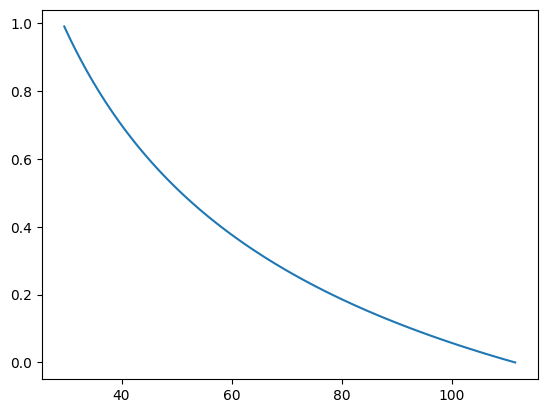

In [42]:
sns.lineplot(x=bond_prices, y=interest_rates)
